In [41]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import numpy as np

In [62]:
# the survey 0 Consent and Baseline
df0 = pd.read_csv(f'/data/meditation/majid/surveys/0.csv', skiprows=[1,2])
# finished the survey
df0 = df0[df0['Finished']==1]
# sort by end date
df0 = df0.sort_values(by = 'EndDate', ascending = True)
# filter the columns
df0 = df0.rename(columns={'Study ID': 'StudyID'})
df0 = df0.rename(columns={'EndDate': 'date'})
df0 = df0[['StudyID','date']]
df0['date'] = pd.to_datetime(df0['date']).dt.date
min_dates = df0.groupby('StudyID')['date'].min()
# find the first day of each participant
def find_first_day(df):
    first_day = {}
    for StudyID in set(df['StudyID'].tolist()):
        df_target = df[df['StudyID']==StudyID]
        first_day[StudyID] = min(df_target['date'])
    return first_day
first_day = find_first_day(df0)
df_id = pd.read_csv('/home/memari/centering_majid/tables/id.csv')
df_id = df_id.rename(columns={'survey_id': 'StudyID'})
df_group = df_id.merge(df0, on='StudyID', how='left')
grouped = df_group.groupby('date')['StudyID'].nunique()
m = grouped.mean()
df_cd = df_group
df_ad = pd.read_csv('ad.csv')
# Rename the 'device_id1' column to 'device_id' in df_cd
df_cd = df_cd.rename(columns={'device_id1': 'device_id'})
df_cd = df_cd.rename(columns={'date': 'date_cd'})
df_ad = df_ad.rename(columns={'date': 'date_ad'})

In [63]:
df_cd.columns

Index(['device_id', 'StudyID', 'device_id2', 'date_cd'], dtype='object')

In [64]:
df_ad.columns

Index(['device_id', 'date_ad'], dtype='object')

In [81]:
# Convert the date columns to datetime objects
df_cd['date_cd'] = pd.to_datetime(df_cd['date_cd'])
df_ad['date_ad'] = pd.to_datetime(df_ad['date_ad'])
# Merge the DataFrames on 'device_id' and 'date'
merged_df = pd.merge(df_cd, df_ad, on=['device_id'], how='inner')
# Remove the 'device_id2' column from the merged DataFrame
merged_df = merged_df.drop(columns=['device_id2'])
merged_df = merged_df.drop(columns=['device_id'])
merged_df['date_diff'] = merged_df['date_ad'] - merged_df['date_cd']
# Sort the merged DataFrame by the 'date_diff' column in ascending order
merged_df = merged_df.sort_values(by='date_diff')
print(merged_df.head(5))
#merged_df.to_csv('merged_df.csv')

     StudyID    date_cd    date_ad date_diff
45  42343422 2022-12-08 2022-12-07   -1 days
5   40162819 2022-11-15 2022-11-14   -1 days
2   87785016 2022-11-11 2022-11-11    0 days
10  79591753 2022-11-18 2022-11-18    0 days
6   35527674 2022-11-15 2022-11-15    0 days


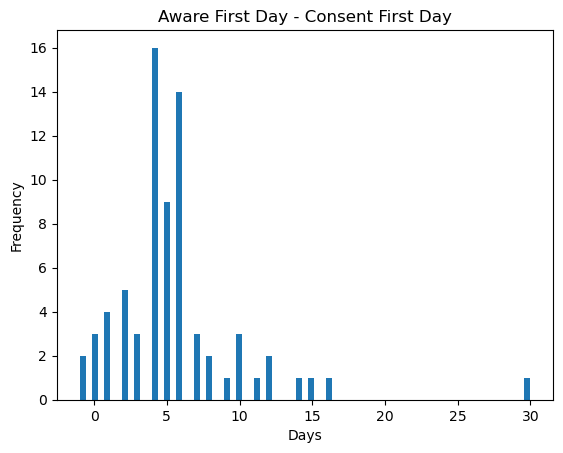

In [80]:
merged_df['date_diff'].astype('timedelta64[D]').plot.hist(bins=75)

# Add labels and a title
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Aware First Day - Consent First Day')

# Show the plot
plt.show()
